In [21]:
conda list

# packages in environment at C:\Users\lilyx\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_py-xgboost-mutex         2.0                       cpu_0    anaconda
alabaster                 0.7.12                   py37_0  
anaconda                  2019.03                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.2                    py37_0  
arrow-cpp                 0.12.1           py37h73c4153_0    conda-forge
asn1crypto                0.24.0                   py37_0  
astroid                   2.2.5                    py37_0  
astropy                   3.1.2            py37he774522_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.1.0                   py37_1  
babel                     2.6.0                    py37_0  
backcall     

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


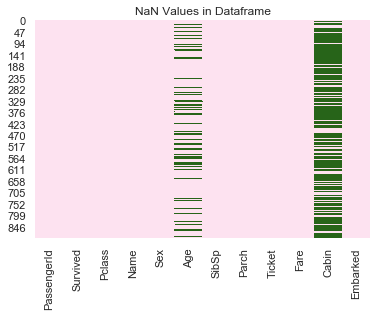

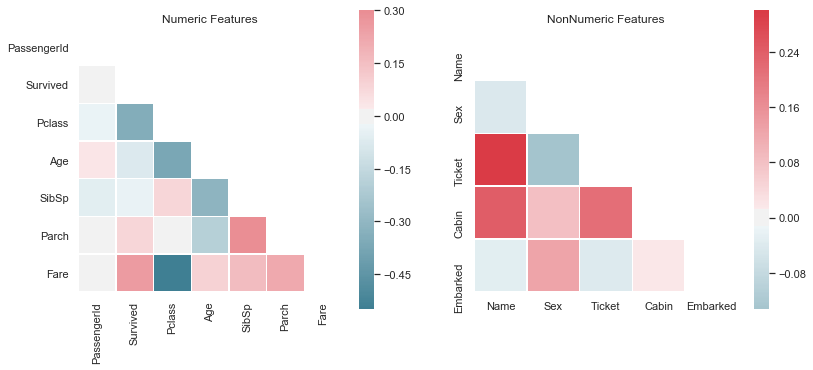

In [18]:
def info(x):
    from string import ascii_letters
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import category_encoders as ce
    
    
    #Check a dataframe for nulls
    df = pd.read_csv(x)
    print(df.isna().sum())
    
    #Plot null values in dataframe
    ax = plt.axes()
#     plt.figure(figsize=(20, 16))
    nanplot = sns.heatmap(df.isnull(), cbar=False, cmap="PiYG", vmin=-0.45, vmax=0.65, ax = ax)
    ax.set_title('NaN Values in Dataframe')
    fig1 = nanplot.get_figure()
    fig1.savefig('PlotOfNaNinDF')

    sns.set(style="white")
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(ncols=2, figsize=(13, 11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    plot1 = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax[0])
    ax[0].set_title('Numeric Features')
    
    
    #second correlation matrix for non-numeric columns
    nonNumeric = df.select_dtypes(exclude = ['number'])
    encoder = ce.OrdinalEncoder()
    nonNumeric_encoded = encoder.fit_transform(nonNumeric)
    
        # Draw the heatmap with the mask and correct aspect ratio
    corr = nonNumeric_encoded.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plot2 = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},ax = ax[1])
    ax[1].set_title('NonNumeric Features')
    fig = plot2.get_figure()
    #save
    fig.savefig('correlation_matrix_num_and_non_num')
    
x = 'train.csv'
info(x)

In [39]:
class People:
    
    spec_type = 'human'
    
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def looks_like(self):# when I call these, it'll take object we already have into a return statement
        #they will do something with actual method
        return "{} looks like he/she is {} years old".format(self.name, self.age)
    
    def sounds_like(self, voice):
        return "{} sounds like a loud {}".format(self.name, voice)
        
# from people import *
Ben = People('Ben', 43)#instantiating real values for class People
Matt = People('Matt', 52)
Dan = People('Dan', 58)

print('{} is {}'.format(Ben.name, Ben.age))

if Ben.spec_type == 'human': #check an object, showing scope, name and age are much lower level attributes
    print('{0} is {1}!'.format(Ben.name, Ben.age))
    
#etl is heavy lifting

People.sounds_like(Matt, 'Elvis')

People.sounds_like(Dan)

Ben is 43
Ben is 43!


NameError: name 'loud' is not defined